# Explore the affect of step size and placement in the dCl/dw numeric derivative

In [165]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [166]:
# get a set of w values
#myWs = -1*np.array([0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99,0.999,
#          1,
#          1.001,1.01,1.02,1.03,1.04,1.05,1.1,1.2,1.3])
myWs = np.array([-0.95,-0.95,-0.95,-1.0,-1.0,-1.0,-1.05,-1.05,-1.05])

# try with ns
#myNss = np.array([0.95,0.95,0.95,0.96,0.96,0.96,0.97,0.97,0.97])

print myWs
nWs = myWs.size
#print myNss
#nNss = myNss.size

#plt.plot(myWs,marker='o')
#plt.show()

[-0.95 -0.95 -0.95 -1.   -1.   -1.   -1.05 -1.05 -1.05]


In [167]:
import time
#hier = 'degenerate'
hier = 'normal'
#nz = 10000
nz = 300000
#nonlinear = True
nonlinear = False
AccuracyBoost = 3

starttime = time.time()
myPks = []
for wNum in range(nWs):
    print 'starting MatterPower ',wNum+1,' of ',nWs
    myPks.append( cp.MatterPower(nz=nz,w=myWs[wNum],wa=0.0,nonlinear=nonlinear,AccuracyBoost=AccuracyBoost,
                                neutrino_hierarchy = hier) )
    #myPks.append( cp.MatterPower(nz=nz,w=-1.0,wa=0.0,nonlinear=nonlinear,AccuracyBoost=AccuracyBoost,
    #                             neutrino_hierarchy = hier, ns=myNss[wNum]) )

    endtime = time.time()

    print 'time elapsed: ', endtime-starttime, ' seconds'
    print 'time elapsed: ', (endtime-starttime)/60., ' minutes'
    print 'time elapsed: ', (endtime-starttime)/3600., ' hours'

print 'nonlinear = ',nonlinear
print 'neutrino_hierarchy = ',hier

starting MatterPower  1  of  9
neutrino_hierarchy =  normal


zs.size:  299998


time elapsed:  73.765337944  seconds
time elapsed:  1.22942229907  minutes
time elapsed:  0.0204903716511  hours
starting MatterPower  2  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  161.089529991  seconds
time elapsed:  2.68482549985  minutes
time elapsed:  0.0447470916642  hours
starting MatterPower  3  of  9
neutrino_hierarchy =  normal


zs.size:  299998


time elapsed:  240.409985065  seconds
time elapsed:  4.00683308442  minutes
time elapsed:  0.0667805514071  hours
starting MatterPower  4  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  311.249029875  seconds
time elapsed:  5.18748383125  minutes
time elapsed:  0.0864580638541  hours
starting MatterPower  5  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  374.600220919  seconds
time elapsed:  6.24333701531  minutes
time elapsed:  0.104055616922  hours
starting MatterPower  6  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  445.280247927  seconds
time elapsed:  7.42133746545  minutes
time elapsed:  0.123688957757  hours
starting MatterPower  7  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  520.020608902  seconds
time elapsed:  8.66701014837  minutes
time elapsed:  0.144450169139  hours
starting MatterPower  8  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  601.98636508  seconds
time elapsed:  10.0331060847  minutes
time elapsed:  0.167218434744  hours
starting MatterPower  9  of  9
neutrino_hierarchy =  normal
zs.size:  299998
time elapsed:  686.888793945  seconds
time elapsed:  11.4481465658  minutes
time elapsed:  0.190802442763  hours
nonlinear =  False
neutrino_hierarchy =  normal


In [168]:
# get some k values to use
nKs = 500
myKs = np.logspace(-4,1,nKs)

# get some z values
nZs = 5
myZs = [0.0,0.5,1.0,2.0,8.0]

# evaluate P(w,z,k)
Pwzk = np.empty((nWs,nZs,nKs))
for wNum in range(nWs):
    for zNum in range(nZs):
        Pwzk[wNum,zNum] = myPks[wNum].PK.P(zNum,myKs)
print 'done'

done


In [169]:
%matplotlib qt

wSet1 = [0,1,2,  9,  16,17,18]
wSet2 = [3,4,5,6,7,  9,  11,12,13,14,15]
wSet3 = [8,9,10]

wSet4 = [0,1,2,3,4,5,6,7,8,9]
wSet5 = [9,10,11,12,13,14,15,16,17,18]

wSet5 = range(nWs)

#for zNum in range(nZs):
for zNum in range(1):
    for wNum in wSet5:
        plt.semilogx(myKs,Pwzk[wNum,zNum],label='w = {0}'.format(myWs[wNum]))
        #plt.semilogx(myKs,Pwzk[wNum,zNum],label='ns = {0}'.format(myWs[wNum]))
    plt.title(r'$P(w,k,z)$ at $z = {0}$'.format(myZs[zNum]))
    #plt.title(r'$P(ns,k,z)$ at $z = {0}$'.format(myZs[zNum]))
    plt.legend()
    plt.xlabel('k')
    plt.show()


# Again, with a finer grid of w values based on sigma(w) = 0.007

In [ ]:
# get a set of w values
%matplotlib inline
myWs = -0.001*(np.arange(29)-14)-1.0
print myWs
nWs = myWs.size
plt.plot(myWs,marker='o')
plt.show()

In [ ]:
import time
#hier = 'degenerate'
hier = 'normal'
#nz = 10000
nz = 300000
#nonlinear = True
nonlinear = False
AccuracyBoost = 3

starttime = time.time()
myPks2 = []
for wNum in range(nWs):
    print 'starting MatterPower ',wNum+1,' of ',nWs
    myPks2.append( cp.MatterPower(nz=nz,w=myWs[wNum],nonlinear=nonlinear,AccuracyBoost=AccuracyBoost,
                                 neutrino_hierarchy = hier) )

    endtime = time.time()

    print 'time elapsed: ', endtime-starttime, ' seconds'
    print 'time elapsed: ', (endtime-starttime)/60., ' minutes'
    print 'time elapsed: ', (endtime-starttime)/3600., ' hours'

print 'nonlinear = ',nonlinear
print 'neutrino_hierarchy = ',hier

In [ ]:
# get some k values to use
nKs = 500
myKs = np.logspace(-4,1,nKs)

# get some z values
nZs = 5
myZs = [0.0,0.5,1.0,2.0,8.0]

# evaluate P(w,z,k)
Pwzk = np.empty((nWs,nZs,nKs))
for wNum in range(nWs):
    for zNum in range(nZs):
        Pwzk[wNum,zNum] = myPks2[wNum].PK.P(zNum,myKs)
print 'done'

In [ ]:
%matplotlib notebook

wSet1 = np.arange(15)
wSet2 = np.arange(15)+14
print wSet1
print wSet2

#for zNum in range(nZs):
for zNum in range(1):
    for wNum in wSet1:
        plt.semilogx(myKs,Pwzk[wNum,zNum],label='w = {0}'.format(myWs[wNum]))
    plt.title(r'$P(w,k,z)$ at $z = {0}$'.format(myZs[zNum]))
    plt.legend()
    plt.xlabel('k')
    plt.show()


In [ ]:
wSet3 = [4,9,14,19,24]
print myWs[wSet3]

In [ ]:
#for zNum in range(nZs):
for zNum in range(1):
    for wNum in wSet2:
        plt.semilogx(myKs,Pwzk[wNum,zNum],label='w = {0}'.format(myWs[wNum]))
    plt.title(r'$P(w,k,z)$ at $z = {0}$'.format(myZs[zNum]))
    plt.legend()
    plt.xlabel('k')
    plt.show()


In [ ]:
#for zNum in range(nZs):
for zNum in range(1):
    for wNum in wSet3:
        plt.semilogx(myKs,Pwzk[wNum,zNum],label='w = {0}'.format(myWs[wNum]))
    plt.title(r'$P(w,k,z)$ at $z = {0}$'.format(myZs[zNum]))
    plt.legend()
    plt.xlabel('k')
    plt.show()


# Do testing to see if w0, wa is working in CAMB and pycamb

In [12]:
import camb
help(camb.model.CAMBparams.set_dark_energy)
reload(cp)

Help on method set_dark_energy in module camb.model:

set_dark_energy(self, w=-1.0, wa=0.0, sound_speed=1.0, dark_energy_model='fluid') unbound camb.model.CAMBparams method
    Set dark energy parameters. Not that in this version these are not actually stored in
    the CAMBparams variable but set globally. So be careful!
    
    :param w: w0 part of p_de/rho_de
    
    :param wa: wa part of p_de/rho_de in w = w0 + wa*( 1-a )
    
    :param sound_speed: rest-frame sound speed of dark energy fluid
    :param dark_energy_model: model to use, default is 'fluid'
    :return: self



<module 'crosspower' from 'crosspower.py'>

In [170]:
# get a set of wa values
#myWas = np.array([-0.050,-0.025,0.000,0.025,0.050]) #version A
#myWas = np.array([0.050,0.025,0.000,-0.025,-0.050]) #version B

#myWas = np.array([-0.2,-0.1,0.0,0.1,0.2]) #version C
#myWas = np.array([0.2,0.1,0.0,-0.1,-0.2]) #version D

#myWas = np.array([-0.1,-0.1,-0.1,-0.1,-0.1]) #version E
#myWas = np.array([0,0,0,0,0]) #version F

myWas = np.array([-0.025,-0.025,-0.025,0.000,0.000,0.000,0.025,0.025,0.025]) #version AA
#myWas = np.array([0.050,0.050,0.025,0.025,0.000,0.000,-0.025,-0.025,-0.050,-0.050]) #version BB

print myWas
nWas = myWas.size
#plt.plot(myWas,marker='o')
#plt.show()

[-0.025 -0.025 -0.025  0.     0.     0.     0.025  0.025  0.025]


In [171]:
import time
#hier = 'degenerate'
hier = 'normal'
#nz = 10000
nz = 300000
#nonlinear = True
nonlinear = False
AccuracyBoost = 3

starttime = time.time()
myPks = []
for waNum in range(nWas):
    print 'starting MatterPower ',waNum+1,' of ',nWas
    reload(cp)
    myPks.append( cp.MatterPower(nz=nz,w=-1,wa=myWas[waNum],nonlinear=nonlinear,AccuracyBoost=AccuracyBoost,
                                 neutrino_hierarchy = hier) )

    endtime = time.time()

    print 'time elapsed: ', endtime-starttime, ' seconds'
    print 'time elapsed: ', (endtime-starttime)/60., ' minutes'
    print 'time elapsed: ', (endtime-starttime)/3600., ' hours'

print 'nonlinear = ',nonlinear
print 'neutrino_hierarchy = ',hier

starting MatterPower  1  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  86.181224823  seconds
time elapsed:  1.43635374705  minutes
time elapsed:  0.0239392291175  hours
starting MatterPower  2  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  168.965390921  seconds
time elapsed:  2.81608984868  minutes
time elapsed:  0.0469348308113  hours
starting MatterPower  3  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  233.410351038  seconds
time elapsed:  3.8901725173  minutes
time elapsed:  0.0648362086217  hours
starting MatterPower  4  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  287.739900827  seconds
time elapsed:  4.79566501379  minutes
time elapsed:  0.0799277502298  hours
starting MatterPower  5  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  341.114048004  seconds
time elapsed:  5.6852341334  minutes
time elapsed:  0.0947539022234  hours
starting MatterPower  6  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  392.764386892  seconds
time elapsed:  6.54607311487  minutes
time elapsed:  0.109101218581  hours
starting MatterPower  7  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  462.055768013  seconds
time elapsed:  7.70092946688  minutes
time elapsed:  0.128348824448  hours
starting MatterPower  8  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  546.687352896  seconds
time elapsed:  9.1114558816  minutes
time elapsed:  0.151857598027  hours
starting MatterPower  9  of  9
neutrino_hierarchy =  normal
zs.size:  299998
time elapsed:  617.762120008  seconds
time elapsed:  10.2960353335  minutes
time elapsed:  0.171600588891  hours
nonlinear =  False
neutrino_hierarchy =  normal


In [172]:
# get some k values to use
nKs = 500
myKs = np.logspace(-4,1,nKs)

# get some z values
nZs = 5
myZs = [0.0,0.5,1.0,2.0,8.0]

# evaluate P(w,z,k)
Pwzk = np.empty((nWas,nZs,nKs))
for waNum in range(nWas):
    for zNum in range(nZs):
        Pwzk[waNum,zNum] = myPks[waNum].PK.P(zNum,myKs)
print 'done'

done


In [178]:
%matplotlib qt

wSet5 = range(nWas)

#for zNum in range(nZs):
for zNum in range(1):
    for wNum in wSet5:
        plt.semilogx(myKs,Pwzk[wNum,zNum],label='wa = {0}'.format(myWas[wNum]))
    plt.title(r'$P(w,k,z)$ at $z = {0}$'.format(myZs[zNum]))
    plt.legend()
    plt.xlabel('k')
    #plt.ylim([75000,82000])
    plt.show()


In [174]:
#Pwzk_m01 = Pwzk.copy() # 5 times: wa=-0.1
#Pwzk_p00 = Pwzk.copy() # 5 times: wa=0

In [175]:
# calculate a few derivatives
#dB02 = (Pwzk[0]-Pwzk[2])/0.05
#dA02 = (Pwzk[4]-Pwzk[2])/0.05

#dB13 = (Pwzk[1]-Pwzk[3])/0.05
#dA13 = (Pwzk[3]-Pwzk[1])/0.05

#dB42 = (Pwzk[2]-Pwzk[4])/0.05
#dA42 = (Pwzk[2]-Pwzk[0])/0.05

#dD02 = (Pwzk[0]-Pwzk[2])/0.2
#dC02 = (Pwzk[4]-Pwzk[2])/0.2

#dD13 = (Pwzk[1]-Pwzk[3])/0.2
#dC13 = (Pwzk[3]-Pwzk[1])/0.2

#dD42 = (Pwzk[2]-Pwzk[4])/0.2
#dC42 = (Pwzk[2]-Pwzk[0])/0.2


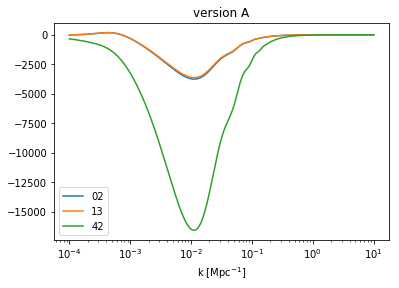

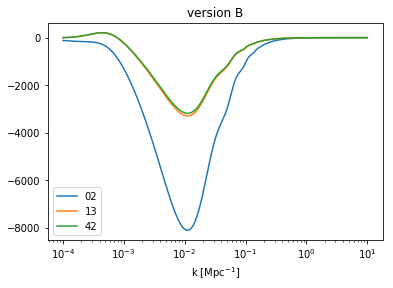

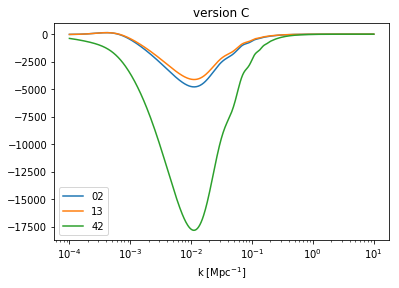

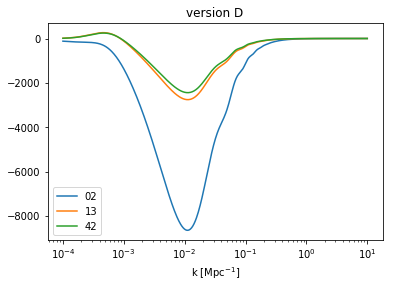

In [176]:
%matplotlib inline

plt.semilogx(myKs,dA02[0],label='02')
plt.semilogx(myKs,dA13[0],label='13')
plt.semilogx(myKs,dA42[0],label='42')
plt.xlabel(r'k [Mpc$^{-1}$]')
plt.title('version A')
plt.legend()
plt.show()

plt.semilogx(myKs,dB02[0],label='02')
plt.semilogx(myKs,dB13[0],label='13')
plt.semilogx(myKs,dB42[0],label='42')
plt.xlabel(r'k [Mpc$^{-1}$]')
plt.title('version B')
plt.legend()
plt.show()

plt.semilogx(myKs,dC02[0],label='02')
plt.semilogx(myKs,dC13[0],label='13')
plt.semilogx(myKs,dC42[0],label='42')
plt.xlabel(r'k [Mpc$^{-1}$]')
plt.title('version C')
plt.legend()
plt.show()

plt.semilogx(myKs,dD02[0],label='02')
plt.semilogx(myKs,dD13[0],label='13')
plt.semilogx(myKs,dD42[0],label='42')
plt.xlabel(r'k [Mpc$^{-1}$]')
plt.title('version D')
plt.legend()
plt.show()


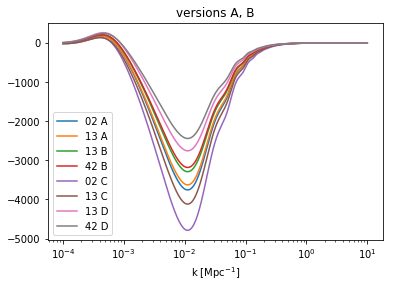

In [177]:
plt.semilogx(myKs,dA02[0],label='02 A')
plt.semilogx(myKs,dA13[0],label='13 A')

plt.semilogx(myKs,dB13[0],label='13 B')
plt.semilogx(myKs,dB42[0],label='42 B')

plt.semilogx(myKs,dC02[0],label='02 C')
plt.semilogx(myKs,dC13[0],label='13 C')

plt.semilogx(myKs,dD13[0],label='13 D')
plt.semilogx(myKs,dD42[0],label='42 D')


plt.xlabel(r'k [Mpc$^{-1}$]')
plt.title('versions A, B')
plt.legend()
plt.show()